## 데이터 세트 준비

In [36]:
#필요한 라이브러리 import
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import Embedding
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
!pip from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN

ERROR: unknown command "from"


In [37]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

#train/test 데이터셋 불러오기
train = pd.read_csv("/content/drive/MyDrive/AI/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
test = pd.read_csv("/content/drive/MyDrive/AI/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# 데이터셋 내용 확인
# Train Data Size: [2934817 rows x 19 columns]
train.head()

# Test Data Size: [733704 rows x 19 columns]
test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [39]:

train.info()

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733705 entries, 0 to 733704
Data columns (total 19 columns):
 #   Column             Non-Null Count  

In [40]:
#null값 갯수 확인
train.isnull().sum()
test.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

### Column 수정

In [41]:
# IP 주소가 있는 행을 식별하기 때문에 pkSeqID 및 seq를 삭제
# category 를 다루기 때문에 category 하위 column 삭제

train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
train.dtypes[train.dtypes=='object']

proto       object
saddr       object
sport       object
daddr       object
dport       object
category    object
dtype: object

In [42]:
#분류가 필요한 열 찾기

train['proto'].value_counts()
train['saddr'].value_counts()
train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [43]:
# category 중 Theft는 제거함

drop_theft = train[train['category']=='Theft'].index
train.drop(drop_theft , inplace=True)

In [44]:
drop_theft = test[test['category']=='Theft'].index
test.drop(drop_theft , inplace=True)

In [45]:
# sport(Source Port Number) 칼럼에서 0x 문자열 찾기

search_string='0x'
result = set([i for i in train['sport'] if i.startswith(search_string)])
result

{'0x0008', '0x000d', '0x0011', '0x0303'}

In [46]:
train['sport']=train['sport'].replace(['0x0303'],'771') 
train['sport']=train['sport'].replace(['0x0011'],'17')
train['sport']=train['sport'].replace(['0x000d'],'13')
train['sport']=train['sport'].replace(['0x0008'],'8')
train['sport']=train['sport'].replace(['0x0303'],'771') 
train['sport']=train['sport'].replace(['0x0011'],'17')
train['sport']=train['sport'].replace(['0x000d'],'13')
train['sport']=train['sport'].replace(['0x0008'],'8')

In [47]:
train["sport"] = train["sport"].astype(str).astype(int)

In [48]:
search_string='0x'
result = set([i for i in train['dport'] if i.startswith(search_string)])
print(len(result))
result

1062


{'0x374f',
 '0x42e3',
 '0x2556',
 '0xcf44',
 '0xb100',
 '0x1804',
 '0xa943',
 '0xd796',
 '0x3c50',
 '0x9526',
 '0xde03',
 '0x6027',
 '0x1346',
 '0x2600',
 '0x2f4c',
 '0x7686',
 '0x31d4',
 '0x1387',
 '0x8e49',
 '0xdc52',
 '0x4c42',
 '0x9905',
 '0xab61',
 '0x7b45',
 '0xbb4f',
 '0x984a',
 '0xf003',
 '0xd752',
 '0x7663',
 '0x4012',
 '0x5102',
 '0x7217',
 '0x3a47',
 '0x0f0d',
 '0x00fe',
 '0x0c04',
 '0x07ec',
 '0x3e45',
 '0xb343',
 '0x0880',
 '0x5543',
 '0x0fc0',
 '0x3a09',
 '0x1742',
 '0xa54f',
 '0x34c0',
 '0x13c0',
 '0x17cd',
 '0x2904',
 '0x1503',
 '0xcc05',
 '0x346b',
 '0x3e25',
 '0xbcf7',
 '0x3454',
 '0x4205',
 '0x0004',
 '0xaa02',
 '0xce54',
 '0x0000',
 '0xff78',
 '0x0a04',
 '0x5000',
 '0xe453',
 '0xa00f',
 '0x411f',
 '0xd393',
 '0x92af',
 '0x0c96',
 '0xb844',
 '0xa217',
 '0x264f',
 '0x8a13',
 '0x149f',
 '0x62d3',
 '0x4f44',
 '0xcebb',
 '0x9a24',
 '0xc254',
 '0x1b56',
 '0x2253',
 '0x310c',
 '0xeb14',
 '0x7000',
 '0xeb5b',
 '0x03d7',
 '0x62c9',
 '0xf51f',
 '0xdc53',
 '0x234e',
 '0x5ca1',

In [49]:
train['dport']=train.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [50]:
train['dport'].value_counts()

 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 40064          1
 40027          1
 40344          1
 3754           1
 61804          1
Name: dport, Length: 6778, dtype: int64

In [51]:
test['sport']=test['sport'].replace(['0x0303'],'771') 
test['sport']=test['sport'].replace(['0x0011'],'17')
test['sport']=test['sport'].replace(['0x000d'],'13')
test['sport']=test['sport'].replace(['0x0008'],'8')

In [52]:
test["sport"] = test["sport"].astype(str).astype(int)

In [53]:
test['dport'] = test.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

#### Label Encoding

In [54]:
# train 데이터에서 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["saddr_enc"]= le.fit_transform(train.saddr)
train["daddr_enc"]= le.fit_transform(train.daddr)
train["proto_enc"]= le.fit_transform(train.proto)
train["category_enc"]= le.fit_transform(train.category)
train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [55]:
# test 데이터에서 레이블 인코딩 수행
test["saddr_enc"]= le.fit_transform(test.saddr)
test["daddr_enc"]= le.fit_transform(test.daddr)
test["proto_enc"]= le.fit_transform(test.proto)
test["category_enc"]= le.fit_transform(test.category)
test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [56]:
# data check
train.head()
test.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc,category_enc
0,48516,80,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,4,12,4,1
1,22267,80,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,2,12,3,0
2,28629,80,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,3,12,4,0
3,42142,80,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,2,12,3,0
4,1645,80,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,3,14,3,1


In [57]:
# data check
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2934752 entries, 0 to 2934816
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              int64  
 1   dport              int64  
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  int64  
 4   min                float64
 5   state_number       int64  
 6   mean               float64
 7   N_IN_Conn_P_DstIP  int64  
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             int64  
 12  saddr_enc          int64  
 13  daddr_enc          int64  
 14  proto_enc          int64  
 15  category_enc       int64  
dtypes: float64(6), int64(10)
memory usage: 380.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 733691 entries, 0 to 733704
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sport              733691 non-null  int64  


#### train data / test data 분할

In [58]:
# y_train 및 y_test 할당

y_train=train["category_enc"]
y_test=test["category_enc"]

In [59]:
pd.Series(y_test).value_counts()

0    385309
1    330112
3     18163
2       107
Name: category_enc, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
train= pd.DataFrame(scaled_features,columns=cols)

In [61]:
features = test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
test= pd.DataFrame(scaled_features,columns=cols)

In [62]:
train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380796,-0.094028,1.260991,0.715435,-0.685661,0.729327,0.301113,0.415159,-0.00763,-0.003355,0.543986,0.011229,1.301786,-0.638504,0.897321
1,-1.434107,-0.094028,-1.006649,-1.826659,1.914132,-0.113083,1.122991,0.415159,-0.00763,-0.003659,0.533940,0.011229,1.301786,-0.638504,-1.049199
2,-0.302346,-0.094028,-0.769399,0.715435,1.319054,-0.113083,0.731954,0.415159,-0.00763,-0.003610,0.316991,0.011229,-1.281470,-0.638504,-1.049199
3,0.825282,-0.094028,1.164956,-0.801621,-0.685661,0.729327,0.653814,-1.621898,-0.00763,-0.003397,1.033365,0.011229,1.301786,-0.638504,0.897321
4,-0.548442,-0.094028,-0.080342,0.715435,1.323028,0.729327,1.154811,0.415159,-0.00763,-0.002707,1.061389,0.011229,-1.281470,-0.638504,0.897321


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934752 entries, 0 to 2934751
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sport              float64
 1   dport              float64
 2   stddev             float64
 3   N_IN_Conn_P_SrcIP  float64
 4   min                float64
 5   state_number       float64
 6   mean               float64
 7   N_IN_Conn_P_DstIP  float64
 8   drate              float64
 9   srate              float64
 10  max                float64
 11  attack             float64
 12  saddr_enc          float64
 13  daddr_enc          float64
 14  proto_enc          float64
dtypes: float64(15)
memory usage: 335.9 MB


#### 과다 및 과소 샘플링으로 데이터 세트 균형 조정

In [64]:
pd.Series(y_train).value_counts()

0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [65]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.svm import SVC
import imblearn
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0 : 1541315, 1 : 1320148, 2 : 72919, 3 : 72919}
random_over= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_over.fit_resample(train,y_train)

from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919, 3 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres1,yres1 = random_under.fit_resample(Xres,yres)

In [66]:
pd.Series(yres1).value_counts()

0    72919
1    72919
2    72919
3    72919
Name: category_enc, dtype: int64

In [67]:
# 데이터 세트 오버/언더 샘플링 조정
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 385309, 1 : 330112, 2 : 330112, 3 : 330112}
random_over_1= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_1.fit_resample(test,y_test)

In [68]:
pd.Series(y_test).value_counts()

0    385309
1    330112
3    330112
2    330112
Name: category_enc, dtype: int64

In [69]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 14584, 1 : 14584, 2 : 14584, 3 : 14584}
random_over_2= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
test,y_test = random_over_2.fit_resample(test,y_test)

In [70]:
pd.Series(y_test).value_counts()

0    14584
1    14584
2    14584
3    14584
Name: category_enc, dtype: int64

In [71]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99 ):
            print("\nReached 99.20% accuracy so cancelling training!")
            self.model.stop_training = True

callback=myCallback()

In [72]:
# 'adam' 대신 옵티마이저 초기화

from tensorflow.keras import optimizers
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [73]:
Xres1.shape

(291676, 15)

In [74]:
# 4개의 밀집 계층 RNN 모델 설계

n_samples, n_feats = Xres1.shape[0], Xres1.shape[1]
Xres1=np.array(Xres1)
Xres1 = Xres1.reshape((n_samples, n_feats, 1))
yres1=np.array(yres1)
yres1 = to_categorical(yres1, 4)
model = Sequential()
model.add(SimpleRNN(n_feats, input_shape=(n_feats, 1)))
model.add(Dense(20))
model.add(Dense(60))
model.add(Dense(80))
model.add(Dense(90))
model.add(Dense(4, activation='softmax'))

In [75]:
#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [76]:
# 검증 데이터
n_samples, n_feats = test.shape[0], test.shape[1]
test=np.array(test)
test = test.reshape((n_samples, n_feats, 1))
y_test=np.array(y_test)
y_test = to_categorical(y_test, 4)

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15)                255       
                                                                 
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 60)                1260      
                                                                 
 dense_2 (Dense)             (None, 80)                4880      
                                                                 
 dense_3 (Dense)             (None, 90)                7290      
                                                                 
 dense_4 (Dense)             (None, 4)                 364       
                                                                 
Total params: 14,369
Trainable params: 14,369
Non-traina

In [78]:
#모델 학습
history = model.fit(Xres1, yres1,batch_size=512,
                                    epochs=1000,
                                    validation_data=(test, y_test),callbacks =[callback],
                                    workers=4)

Epoch 1/1000
570/570 [==============================] - 9s 11ms/step - loss: 0.5267 - accuracy: 0.7920 - val_loss: 0.2415 - val_accuracy: 0.8857
Epoch 2/1000
570/570 [==============================] - 6s 11ms/step - loss: 0.1552 - accuracy: 0.9409 - val_loss: 0.1054 - val_accuracy: 0.9713
Epoch 3/1000
570/570 [==============================] - 6s 10ms/step - loss: 0.0865 - accuracy: 0.9742 - val_loss: 0.0795 - val_accuracy: 0.9769
Epoch 4/1000
570/570 [==============================] - 6s 11ms/step - loss: 0.0701 - accuracy: 0.9792 - val_loss: 0.0671 - val_accuracy: 0.9814
Epoch 5/1000
570/570 [==============================] - 6s 11ms/step - loss: 0.0627 - accuracy: 0.9815 - val_loss: 0.0622 - val_accuracy: 0.9833
Epoch 6/1000
570/570 [==============================] - 6s 10ms/step - loss: 0.0579 - accuracy: 0.9834 - val_loss: 0.0569 - val_accuracy: 0.9856
Epoch 7/1000
570/570 [==============================] - 6s 10ms/step - loss: 0.0547 - accuracy: 0.9846 - val_loss: 0.0657 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


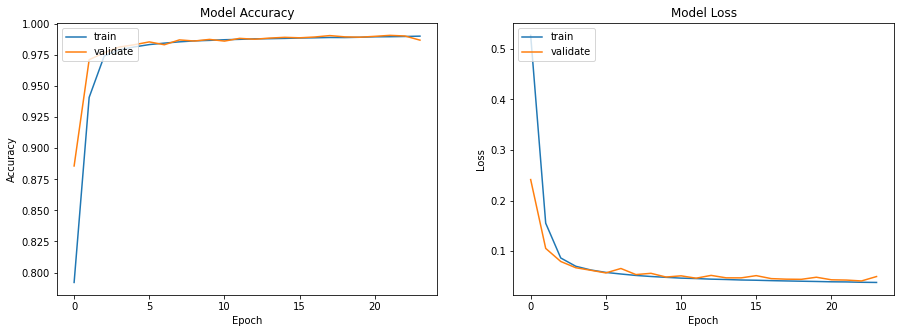

In [79]:
# plt로 모델 정확도, 검증 정확도 및 모델 손실 시각화

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # 정확성을 위해 기록 요약
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # 손실 내역 요약
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# 기록의 모든 데이터 나열
print(history.history.keys())

plotmodelhistory(history)

In [80]:
scores = model.evaluate(test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1823/1823 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9870
Test loss: 0.049751412123441696
Test accuracy: 0.9869891405105591


In [81]:
pred = model.predict(test)

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # 가로축 레이블이 맨 위에 나타나도록 함
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # 각 목록 항목으로 레이블을 지정
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # 데이터에 따라 텍스트 색상을 변경
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

1823/1823 [==============================] - 5s 3ms/step


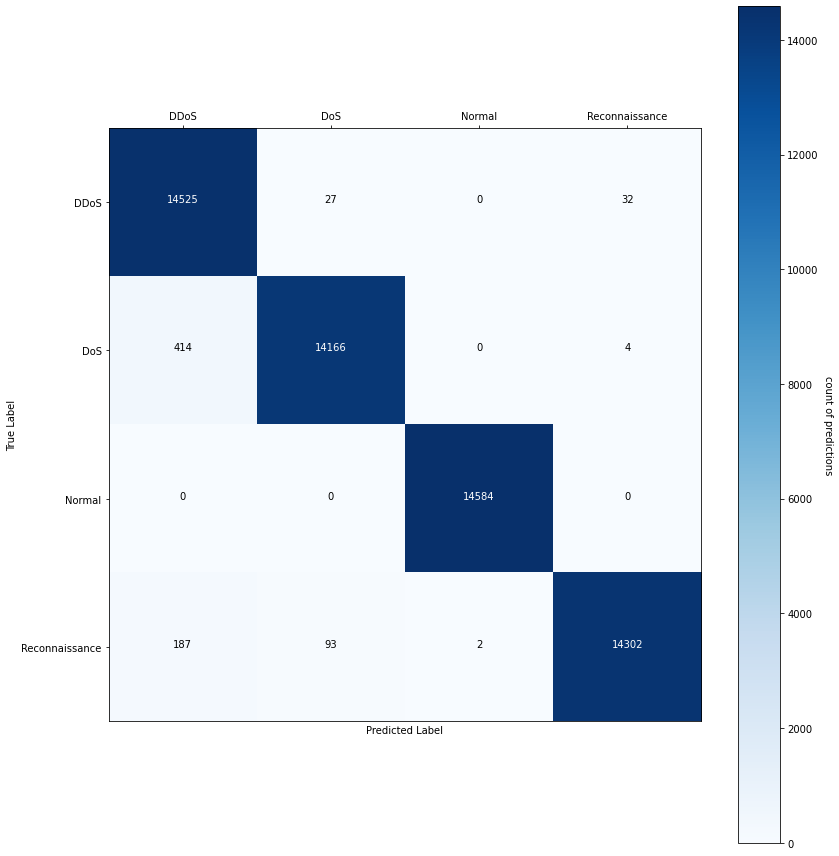

In [82]:
labels = ['DDoS', 'DoS', 'Normal', 'Reconnaissance']

# 예측 클래스를 하나의 핫 벡터로 변환
Y_pred_classes = np.argmax(pred, axis=1) 
# 검증 관찰을 하나의 핫 벡터로 변환
Y_true = np.argmax(y_test, axis=1)
# 오류는 예측 레이블과 실제 레이블 간의 차이
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_true, Y_pred_classes,target_names=labels))

                precision    recall  f1-score   support

          DDoS       0.96      1.00      0.98     14584
           DoS       0.99      0.97      0.98     14584
        Normal       1.00      1.00      1.00     14584
Reconnaissance       1.00      0.98      0.99     14584

      accuracy                           0.99     58336
     macro avg       0.99      0.99      0.99     58336
  weighted avg       0.99      0.99      0.99     58336



In [84]:
ypred = model.predict(Xres1)
ypred = ypred.argmax(axis=-1)
yres1 = yres1.argmax(axis=-1)

9115/9115 [==============================] - 26s 3ms/step


ROC AUC score: 0.99271337602911


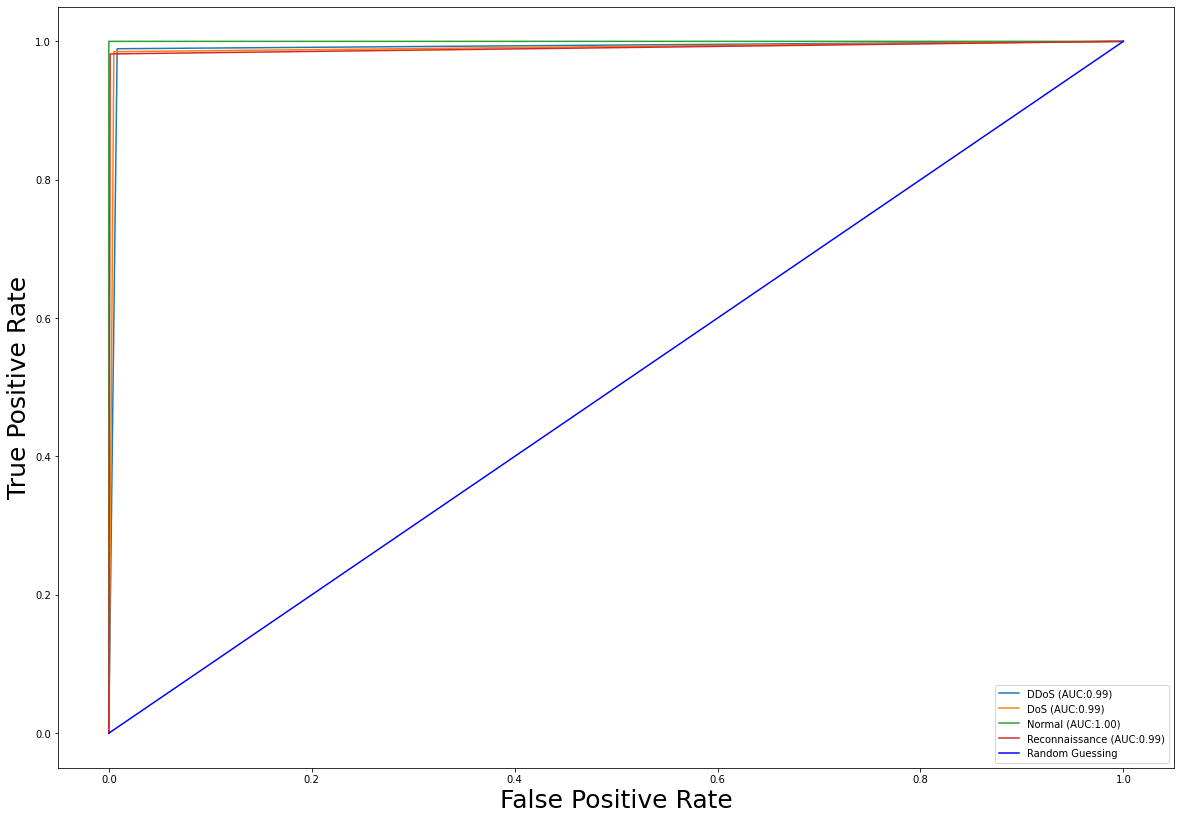

In [85]:
#  ROC(Receiver Operating Characteristic) curve
# 좌상단에 붙어있는 커브가 더 좋은 분류기를 의미

import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target = ['DDoS', 'DoS', 'Normal', 'Reconnaissance']


fig, c_ax = plt.subplots(1,1, figsize = (20, 14))

# 다중 클래스에 대한 roc auc 점수 채점 기능
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(ypred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(yres1, ypred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize=25)
c_ax.set_ylabel('True Positive Rate',fontsize=25)
plt.savefig('ROC_RNN',dpi=400)
plt.show()

